TALLER GUIADO DE ESTADÍSTICA Y VISUALIZACIÓN

La Intencionalidad del taller se centra en la generación de estadística descriptiva, a partir de un DataFrame de prueba. 
Adicionalmente, se busca hacer un acercamiento práctico al uso de las librerias de Seaborn y Matplotlib. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_dataset = "https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/seguros.csv"

# Intentamos cargar el DataFrame usando pandas
try:
    df_seguros = pd.read_csv(url_dataset)
    print("Dataset 'seguros.csv' cargado exitosamente.")
    print("\nPrimeras 5 filas del DataFrame para una vista rápida:")
    print(df_seguros.head())
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Por favor, verifica la URL o tu conexión a internet.")

Dataset 'seguros.csv' cargado exitosamente.

Primeras 5 filas del DataFrame para una vista rápida:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
df_seguros.info()
print("\nDescripción estadística del DataFrame:")
print(df_seguros.describe())

In [ ]:
print("\n Conteo de valores únicos en cada columna:")   
for col in df_seguros.select_dtypes(include='object').columns:
    print(f"\nColumna: '{col}'")
    # .nunique() nos da el número de valores únicos en la columna
    print(f"- Número de valores únicos: {df_seguros[col].nunique()}")
    print("- Conteo de cada valor único:")
    print(df_seguros[col].value_counts())
    print("-" * 40) # Separador para mejor legibilidad

In [ ]:
print("\n--- Resumen Estadístico General (df.describe()) ---")
# df.describe() proporciona un resumen de las principales estadísticas descriptivas
# para las columnas numéricas del DataFrame.
print(df_seguros.describe())

In [ ]:
print("\n--- Media, Mediana y Moda ---")

# Calculamos la media para columnas numéricas
print(f"Media de la edad: {df_seguros['age'].mean():.2f}")
print(f"Media del IMC: {df_seguros['bmi'].mean():.2f}")
print(f"Media de los cargos: {df_seguros['charges'].mean():.2f}")

# Calculamos la mediana para columnas numéricas
print(f"\nMediana de la edad: {df_seguros['age'].median():.2f}")
print(f"Mediana del IMC: {df_seguros['bmi'].median():.2f}")
print(f"Mediana de los cargos: {df_seguros['charges'].median():.2f}")

# Calculamos la moda para columnas categóricas (o numéricas si aplica)
# .mode() puede devolver una Serie si hay múltiples modas, por eso usamos [0] para la primera.
print(f"\nModa del sexo: {df_seguros['sex'].mode()[0]}")
print(f"Moda de la región: {df_seguros['region'].mode()[0]}")
print(f"Moda de la cantidad de hijos: {df_seguros['children'].mode()[0]}")

In [ ]:
print("\n--- Mínimo, Máximo y Rango ---")

for col in ['age', 'bmi', 'charges']:
    min_val = df_seguros[col].min()
    max_val = df_seguros[col].max()
    range_val = max_val - min_val
    print(f"\nColumna '{col}':")
    print(f"  Mínimo: {min_val:.2f}")
    print(f"  Máximo: {max_val:.2f}")
    print(f"  Rango: {range_val:.2f}")

In [ ]:
print("\n--- Varianza y Desviación Estándar ---")

for col in ['age', 'bmi', 'charges']:
    variance = df_seguros[col].var()
    std_dev = df_seguros[col].std()
    print(f"\nColumna '{col}':")
    print(f"  Varianza: {variance:.2f}")
    print(f"  Desviación Estándar: {std_dev:.2f}")


--- Varianza y Desviación Estándar ---

Columna 'age':
  Varianza: 197.40
  Desviación Estándar: 14.05

Columna 'bmi':
  Varianza: 37.19
  Desviación Estándar: 6.10

Columna 'charges':
  Varianza: 146652372.15
  Desviación Estándar: 12110.01


In [ ]:
asimetria = df_seguros["charges"].skew()
curtosis_val = df_seguros["charges"].kurtosis()

print("Asimetría:", asimetria)
print("Curtósis:", curtosis_val)

Asimetría: 1.5158796580240388
Curtósis: 1.6062986532967907


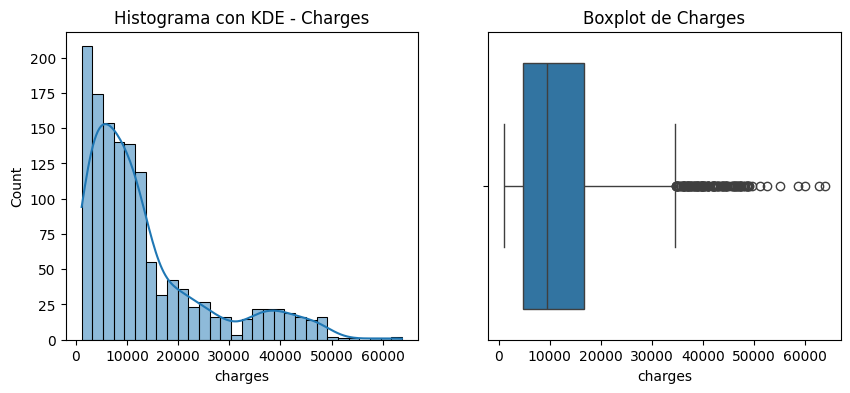

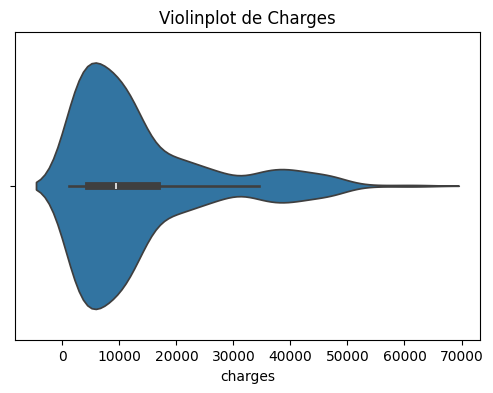

In [22]:
plt.figure(figsize=(10,4))

# Histograma + KDE
plt.subplot(1,2,1)
sns.histplot(df_seguros["charges"], bins=30, kde=True)
plt.title("Histograma con KDE - Charges")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_seguros["charges"])
plt.title("Boxplot de Charges")

plt.show()

# Violinplot
plt.figure(figsize=(6,4))
sns.violinplot(x=df_seguros["charges"])
plt.title("Violinplot de Charges")
plt.show()


GRÁFICOS

In [ ]:
df_seguros['age'].hist(bins=7, color='lightblue', edgecolor='black')

In [ ]:
sns.boxplot(x= df_seguros['age'], color='lightblue')

In [ ]:
sns.boxplot(x=df_seguros['sex'], y= df_seguros['bmi'], color='lightblue')

In [ ]:
sns.boxplot(x='smoker', y='charges', data= df_seguros, color='lightblue')

<Axes: ylabel='region'>

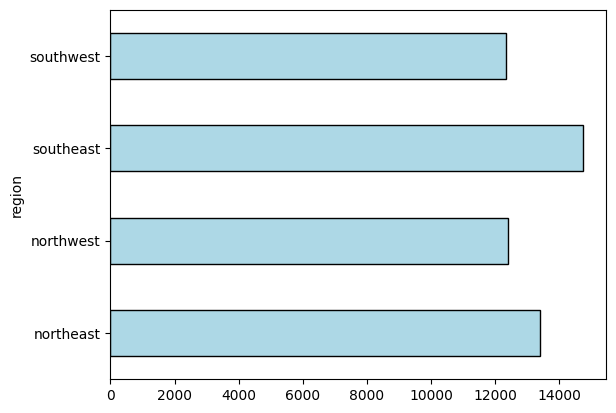

In [40]:
df_seguros.groupby('region')['charges'].mean().plot(kind='barh', color='lightblue', edgecolor='black')

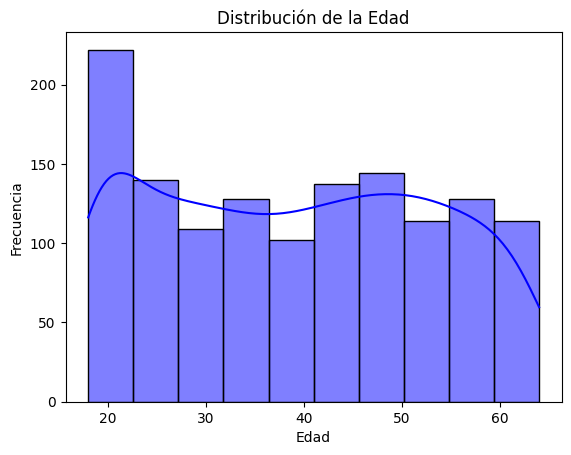

In [44]:
sns.histplot(data=df_seguros, x='age', kde=True, bins=10, color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show();

In [ ]:
print("\n--- Visualización: Histogramas y Box Plots ---")

# Histograma para 'age'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1) # 1 fila, 3 columnas, primer gráfico
sns.histplot(df_seguros['age'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma para 'bmi'
plt.subplot(1, 3, 2) # Segundo gráfico
sns.histplot(df_seguros['bmi'], kde=True, bins=15, color='lightcoral')
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

# Histograma para 'charges'
plt.subplot(1, 3, 3) # Tercer gráfico
sns.histplot(df_seguros['charges'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de los Cargos del Seguro')
plt.xlabel('Cargos ($)')
plt.ylabel('Frecuencia')
plt.tight_layout() # Ajusta automáticamente los parámetros para que las subtramas encajen en el área de la figura.
plt.show()

# Box Plot de 'charges' por 'smoker'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df_seguros, palette='coolwarm')
plt.title('Cargos del Seguro por Hábito de Fumar')
plt.xlabel('Fumador (yes/no)')
plt.ylabel('Cargos del Seguro ($)')
plt.show()

# Box Plot de 'bmi' por 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df_seguros, palette='pastel')
plt.title('Distribución del IMC por Sexo')
plt.xlabel('Sexo')
plt.ylabel('IMC')
plt.show()
;
# Histograma para 'charges'
plt.subplot(1, 3, 3) # Tercer gráfico
sns.histplot(df_seguros['sex'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de los Cargos del Seguro')
plt.xlabel('Cargos ($)')
plt.ylabel('Frecuencia')
plt.tight_layout() # Ajusta automáticamente los parámetros para que las subtramas encajen en el área de la figura.
plt.show()


In [ ]:
print("\n--- Visualización: Histogramas y Box Plots ---")

# Histograma para 'age'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1) # 1 fila, 3 columnas, primer gráfico
sns.histplot(df_seguros['age'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma para 'bmi'
plt.subplot(1, 3, 2) # Segundo gráfico
sns.histplot(df_seguros['bmi'], kde=True, bins=15, color='lightcoral')
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

# Histograma para 'charges'
plt.subplot(1, 3, 3) # Tercer gráfico
sns.histplot(df_seguros['charges'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de los Cargos del Seguro')
plt.xlabel('Cargos ($)')
plt.ylabel('Frecuencia')
plt.tight_layout() # Ajusta automáticamente los parámetros para que las subtramas encajen en el área de la figura.
plt.show()

# Box Plot de 'charges' por 'smoker'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df_seguros, palette='coolwarm')
plt.title('Cargos del Seguro por Hábito de Fumar')
plt.xlabel('Fumador (yes/no)')
plt.ylabel('Cargos del Seguro ($)')
plt.show()

# Box Plot de 'bmi' por 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df_seguros, palette='pastel')
plt.title('Distribución del IMC por Sexo')
plt.xlabel('Sexo')
plt.ylabel('IMC')
plt.show()


In [ ]:
print("\n--- Asimetría (Skewness) y Curtosis (Kurtosis) ---")

for col in ['age', 'bmi', 'charges']:
    skewness = df_seguros[col].skew()
    kurtosis = df_seguros[col].kurt()
    print(f"\nColumna '{col}':")
    print(f"  Asimetría (Skewness): {skewness:.2f}")
    print(f"  Curtosis (Kurtosis): {kurtosis:.2f}")

In [ ]:
print("\n--- Error Típico de la Media (SEM) ---")

for col in ['age', 'bmi', 'charges']:
    sem = df_seguros[col].sem()
    print(f"Error Típico de la Media para '{col}': {sem:.3f}")

In [ ]:
print("\n--- Covarianza ---")
# Calculamos la matriz de covarianza para las columnas numéricas.
# df.cov() calcula la covarianza entre pares de columnas.
print(df_seguros[['age', 'bmi', 'children', 'charges']].cov())

ÚLTIMOS GRÁFICOS

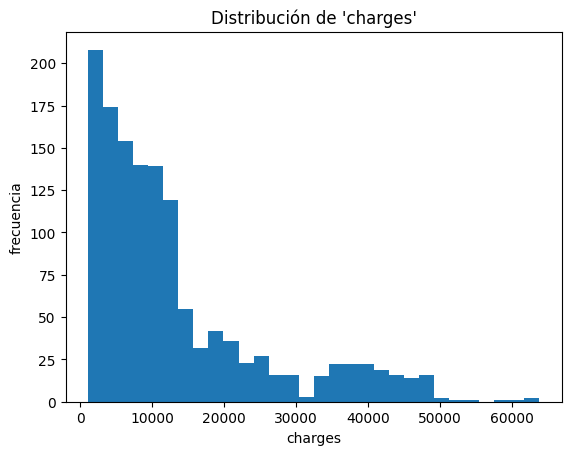

In [6]:
# Histograma de 'charges'
plt.figure()
plt.hist(df_seguros["charges"], bins=30)
plt.title("Distribución de 'charges'")
plt.xlabel("charges"); plt.ylabel("frecuencia")
plt.show()

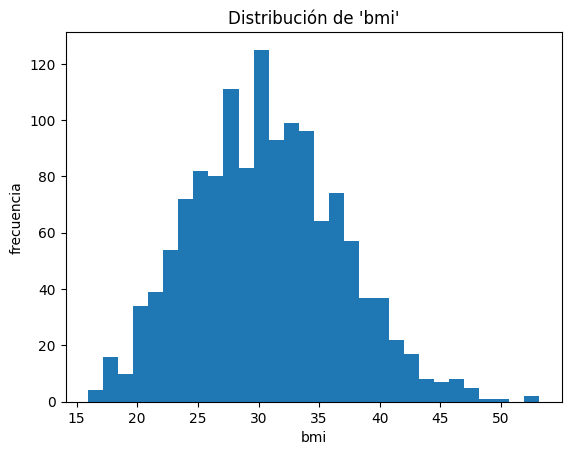

In [7]:
# Histograma de 'bmi'
plt.figure()
plt.hist(df_seguros["bmi"], bins=30)
plt.title("Distribución de 'bmi'")
plt.xlabel("bmi"); plt.ylabel("frecuencia")
plt.show()

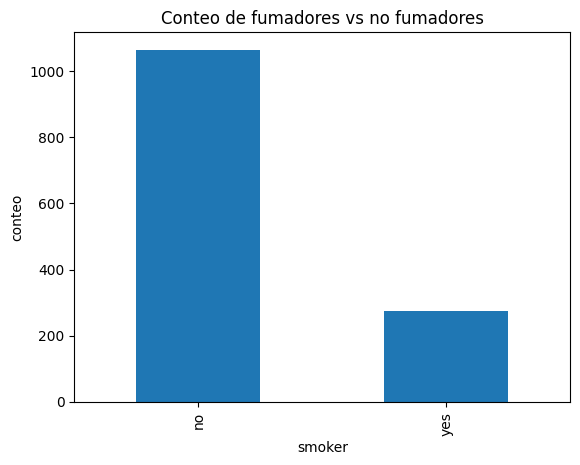

In [9]:
# Barras de conteo para categóricas
plt.figure()
df_seguros["smoker"].value_counts().plot(kind="bar")
plt.title("Conteo de fumadores vs no fumadores")
plt.xlabel("smoker"); plt.ylabel("conteo")
plt.show()

## 6) Visualizaciones bivariadas

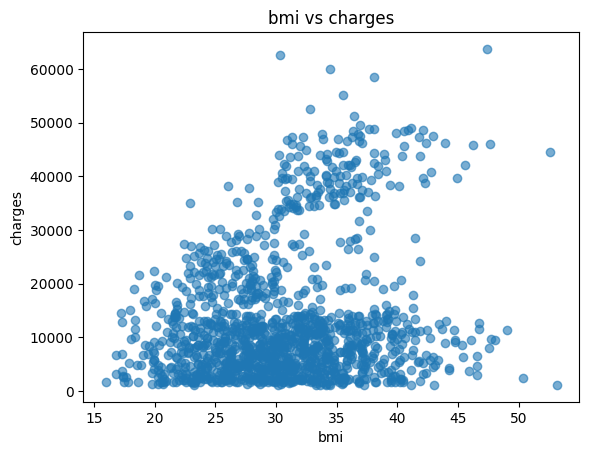

In [10]:
# Dispersión: bmi vs charges
plt.figure()
plt.scatter(df_seguros["bmi"], df_seguros["charges"], alpha=0.6)
plt.title("bmi vs charges")
plt.xlabel("bmi"); plt.ylabel("charges")
plt.show()


<Figure size 640x480 with 0 Axes>

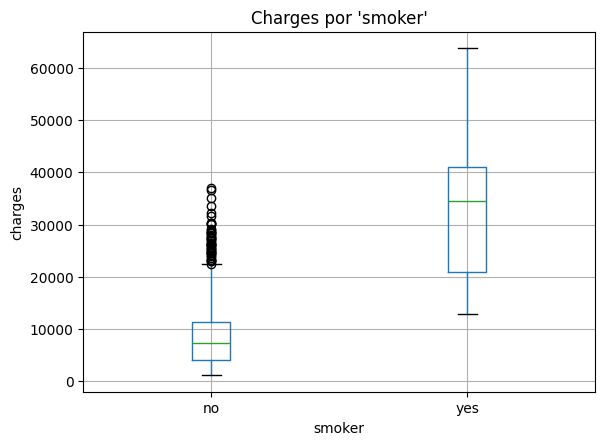

In [11]:
# Boxplot: charges por smoker
plt.figure()
df_seguros.boxplot(column="charges", by="smoker")
plt.title("Charges por 'smoker'"); plt.suptitle("")
plt.xlabel("smoker"); plt.ylabel("charges")
plt.show()

<Figure size 640x480 with 0 Axes>

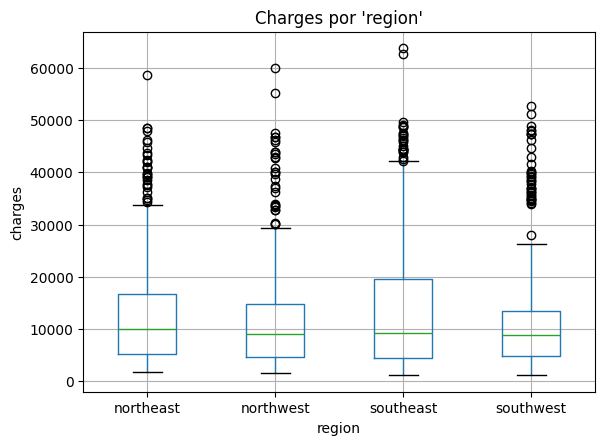

In [12]:
# Boxplot: charges por region
plt.figure()
df_seguros.boxplot(column="charges", by="region", rot=0)
plt.title("Charges por 'region'"); plt.suptitle("")
plt.xlabel("region"); plt.ylabel("charges")
plt.show()

## 7) Visualizaciones multivariadas

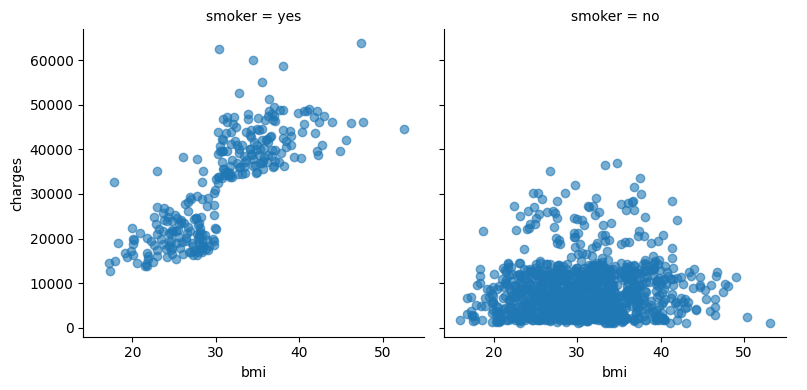

In [14]:
# Facetas: relación bmi-charges, separado por 'smoker'
g = sns.FacetGrid(df_seguros, col="smoker", height=4)
g.map(plt.scatter, "bmi", "charges", alpha=0.6)
g.add_legend()
plt.show()

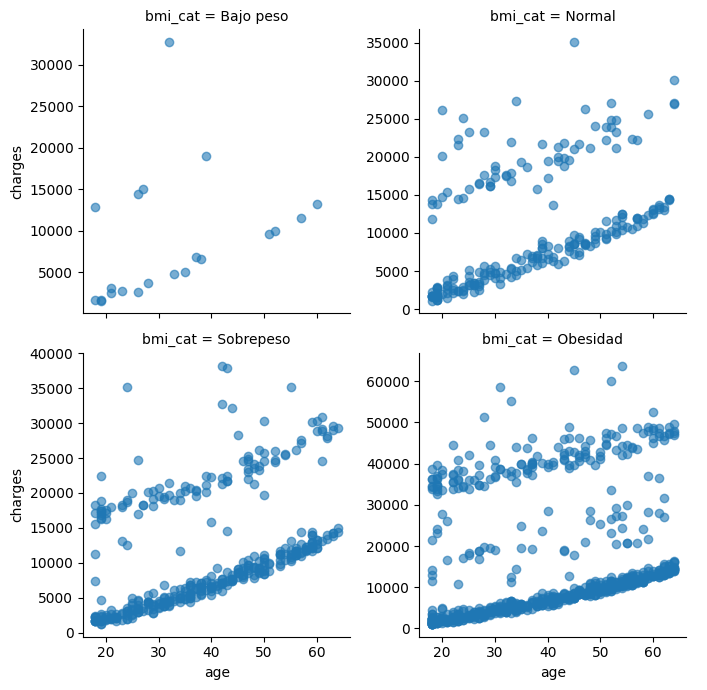

In [26]:
#Crear categorías de BMI
df_seguros["bmi_cat"] = pd.cut(df_seguros["bmi"],
                               bins=[0, 18.5, 25, 30, 100],
                               labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad"])
# Facetas 2: charges vs age por categoría de bmi
g = sns.FacetGrid(df_seguros, col="bmi_cat", col_wrap=2, height=3.5, sharey=False)
g.map(plt.scatter, "age", "charges", alpha=0.6)
g.add_legend()
plt.show()


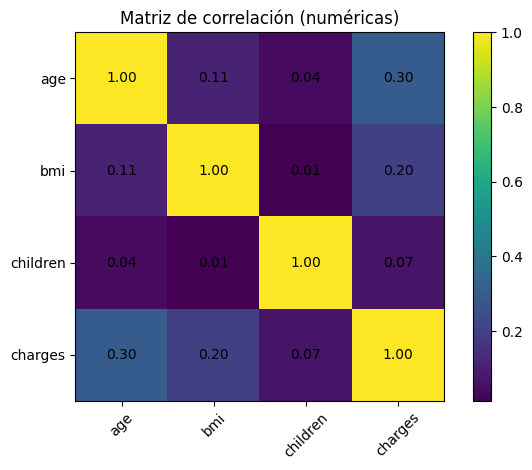

In [5]:
# Matriz de correlación (numéricas)
num_cols = ["age", "bmi", "children", "charges"]
corr = df_seguros[num_cols].corr()
plt.figure()
plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de correlación (numéricas)")
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center")
plt.tight_layout()
plt.show()

## 8) Filtros y segmentaciones (query / loc)

In [6]:
# Filtro: fumadores con BMI > 30
f1 = df_seguros.query("smoker == 'yes' and bmi > 30")
f1.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [7]:
# Filtro múltiple: región 'southeast' y al menos 2 hijos
f2 = df_seguros[(df_seguros["region"] == "southeast") & (df_seguros["children"] >= 2)]
f2.head()

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.00,3,no,southeast,4449.4620
25,59,female,27.72,3,no,southeast,14001.1338
41,31,female,36.63,2,no,southeast,4949.7587
43,37,female,30.80,2,no,southeast,6313.7590
57,18,male,31.68,2,yes,southeast,34303.1672


## 9) Agrupaciones (groupby), comparaciones y tablas pivote

In [8]:
# Promedio de charges por smoker
grp1 = df_seguros.groupby("smoker")["charges"].agg(["count","mean","median","std"]).reset_index()
grp1

,smoker,count,mean,median,std
0,no,1064,8434.268298,7345.40530,5993.781819
1,yes,274,32050.231832,34456.34845,11541.547176


In [9]:
# Promedio de charges por región y fumador
grp2 = df_seguros.groupby(["region","smoker"])["charges"].mean().unstack()
grp2

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [11]:
# Tabla pivote: media de charges por (region x bmi_cat)
pv = pd.pivot_table(df_seguros, values="charges", index="region", columns="bmi",
                    aggfunc="mean", fill_value=0)
pv

bmi,15.960,16.815,17.195,17.290,17.385,17.400,17.480,17.670,17.765,17.800,...,46.750,47.410,47.520,47.600,47.740,48.070,49.060,50.380,52.580,53.130
region,,,,,,,,,,,,,,,,,,,,,
northeast,1694.7964,4904.00035,14455.64405,7813.353433,0.00000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.00000,0.0000,0.000,0.0000,9432.9253,0.0000,0.0000,0.0000,0.0000
northwest,0.0000,0.00000,0.00000,0.000000,2775.19215,0.000,1621.3402,2680.9493,32734.1863,0.000,...,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
southeast,0.0000,0.00000,0.00000,0.000000,0.00000,0.000,0.0000,0.0000,0.0000,0.000,...,12592.5345,63770.42801,8083.9198,0.000,9748.9106,0.0000,11381.3254,2438.0552,44501.3982,1163.4627
southwest,0.0000,0.00000,0.00000,0.000000,0.00000,2585.269,0.0000,0.0000,0.0000,1727.785,...,0.0000,0.00000,0.0000,46113.511,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# Gráfico de barras apiladas a partir de la pivote (media charges por region x bmi_cat)
plt.figure()
pv.plot(kind="bar", stacked=True)
plt.title("Media de charges por región y categoría de BMI")
plt.xlabel("region"); plt.ylabel("media de charges")
plt.tight_layout()
plt.show()

## 10) Combinaciones útiles: grid de gráficos

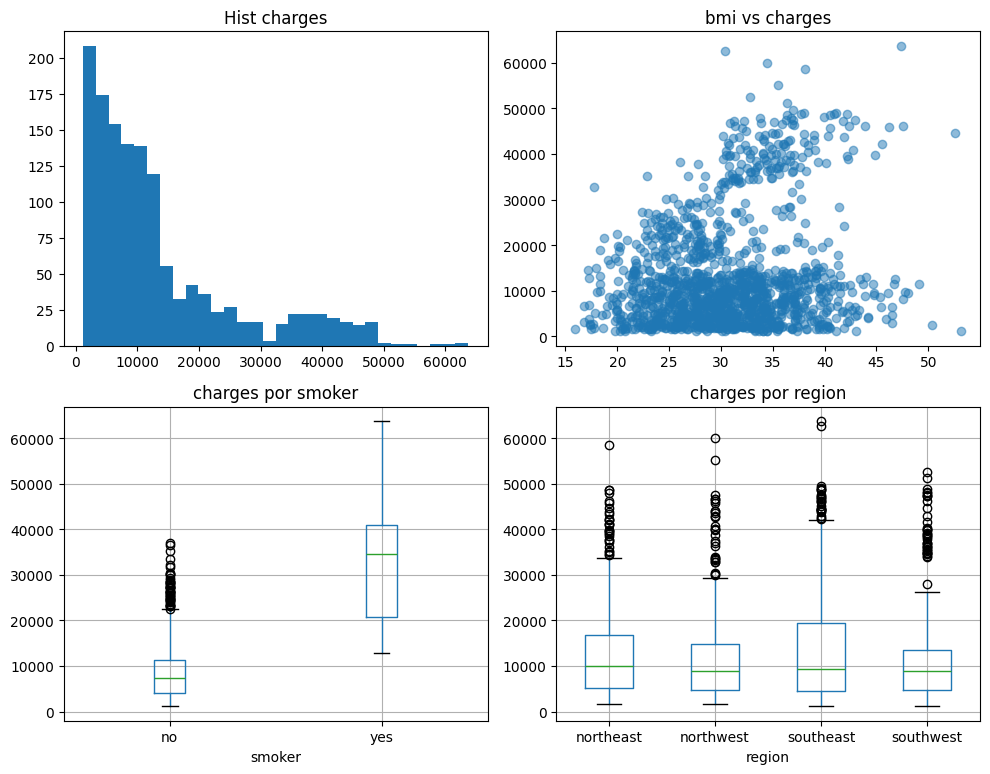

In [14]:
# Grid 2x2 con diferentes vistas de 'charges'
fig, axes = plt.subplots(2,2, figsize=(10,8))

axes[0,0].hist(df_seguros["charges"], bins=30)
axes[0,0].set_title("Hist charges")

axes[0,1].scatter(df_seguros["bmi"], df_seguros["charges"], alpha=0.5)
axes[0,1].set_title("bmi vs charges")

df_seguros.boxplot(column="charges", by="smoker", ax=axes[1,0])
axes[1,0].set_title("charges por smoker")
axes[1,0].figure.suptitle("")

df_seguros.boxplot(column="charges", by="region", ax=axes[1,1])
axes[1,1].set_title("charges por region")
axes[1,1].figure.suptitle("")

plt.tight_layout()
plt.show()

## 11) Guardar figuras en disco (para informes)

In [15]:
import os
os.makedirs("figs", exist_ok=True)

plt.figure()
plt.hist(df_seguros["charges"], bins=30)
plt.title("Distribución de charges")
plt.savefig("figs/hist_charges.png", dpi=150, bbox_inches="tight")
plt.close()

print("Figura guardada en figs/hist_charges.png")

Figura guardada en figs/hist_charges.png


## 13) Bonus: Funciones reutilizables / pipeline simple

In [ ]:
def resumen_num(df, cols):
    return df[cols].describe()

def graf_boxplot_por_cat(df, col_num, col_cat):
    plt.figure()
    df.boxplot(column=col_num, by=col_cat, rot=0)
    plt.title(f"{col_num} por {col_cat}"); plt.suptitle("")
    plt.show()

# Ejemplo de uso:
resumen_num(df_seguros, ["age","bmi","children","charges"])

#graf_boxplot_por_cat(df_seguros, "charges", "region")


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 12) Retos (para practicar)


1. **Análisis de la asimetría y la curtósis**

1. Calcular asimetría y curtósis para la columna bmi.

2. Comparar charges entre fumadores y no fumadores usando violinplot.

3. Hacer un pairplot de todas las variables numéricas.

4. Crear un gráfico de barras con el promedio de charges por región.

1. **Comparar impacto del tabaquismo por región:**  
   Calcula `mean`, `median` y `std` de `charges` por `smoker` dentro de cada `region`.  
   Luego, grafica un **bar chart** de las medias para comparar.

2. **Efecto de la edad por categorías de IMC:**  
   Crea grupos de edad (por ejemplo: `<=30`, `31-45`, `>45`) y calcula la media de `charges` por (`bmi_cat`, `grupo_edad`).  
   Grafica con barras agrupadas.

3. **Top 10 clientes por charges** y su perfil:  
   Muestra un `df.nlargest(10, "charges")` con `age`, `bmi`, `smoker`, `region`.  
   Haz un gráfico de barras horizontal con sus `charges`.

4. **Detección simple de outliers en charges:**  
   Calcula Q1, Q3 e IQR; considera outlier si `charges < Q1 - 1.5*IQR` o `> Q3 + 1.5*IQR`.  
   ¿Qué porcentaje de registros resulta outlier?

5. **Mapa de calor simple de medias:**  
   Usa una tabla pivote de `charges` por `smoker` y `region` y plótala con `plt.imshow`.  
   Añade anotaciones con los valores.

### Siguientes pasos sugeridos
- Replicar este análisis con un subconjunto filtrado (por ejemplo, solo `smoker == "yes"`).
- Exportar métricas agregadas a CSV para un informe.
- Crear un **README** con capturas de los gráficos generados.

Total registros: 1338
Total fumadores: 274


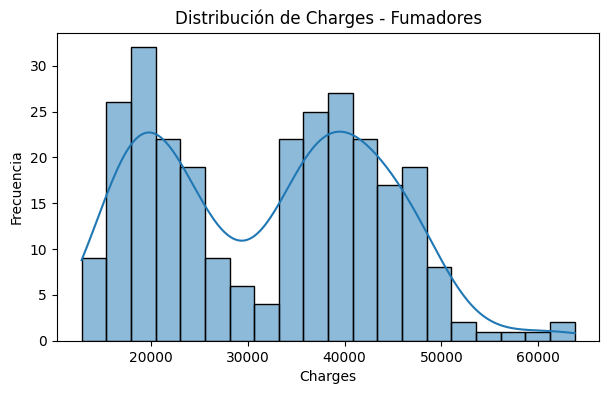

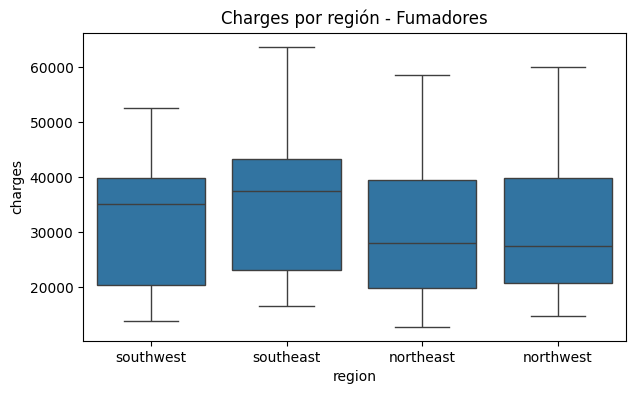

In [29]:
# Filtrar solo fumadores
df_smokers = df_seguros[df_seguros["smoker"] == "yes"]

print(f"Total registros: {len(df_seguros)}")
print(f"Total fumadores: {len(df_smokers)}")

# Ejemplo: histograma de charges solo para fumadores
plt.figure(figsize=(7,4))
sns.histplot(df_smokers["charges"], kde=True, bins=20)
plt.title("Distribución de Charges - Fumadores")
plt.xlabel("Charges")
plt.ylabel("Frecuencia")
plt.show()

# Ejemplo: boxplot por región solo para fumadores
plt.figure(figsize=(7,4))
sns.boxplot(x="region", y="charges", data=df_smokers)
plt.title("Charges por región - Fumadores")
plt.show()

## Exportar métricas agregadas a CSV

In [30]:
# Calcular métricas
metricas_smokers = df_smokers.groupby("region")["charges"].agg(
    promedio="mean",
    mediana="median",
    desviacion_std="std",
    maximo="max",
    minimo="min"
).reset_index()

print(metricas_smokers)

# Exportar a CSV
metricas_smokers.to_csv("metricas_charges_fumadores.csv", index=False)
print("Archivo 'metricas_charges_fumadores.csv' exportado correctamente.")

      region      promedio       mediana  desviacion_std       maximo  \
0  northeast  29673.536473  28101.333050    11589.559770  58571.07448   
1  northwest  30192.003182  27488.996475    11413.827702  60021.39897   
2  southeast  34844.996824  37484.449300    11324.766536  63770.42801   
3  southwest  32269.063494  35165.256500    11270.279593  52590.82939   

       minimo  
0  12829.4551  
1  14711.7438  
2  16577.7795  
3  13844.5060  
Archivo 'metricas_charges_fumadores.csv' exportado correctamente.


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


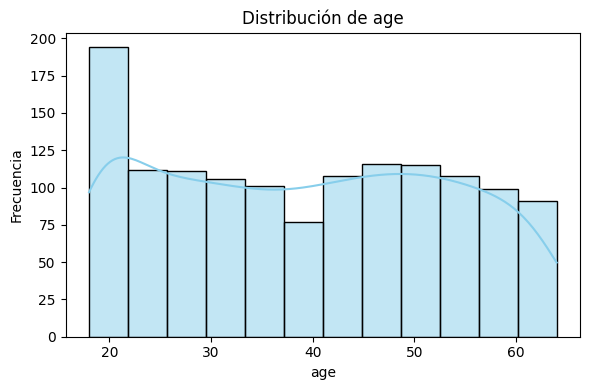

age → Asimetría: 0.06, Curtosis: -1.24


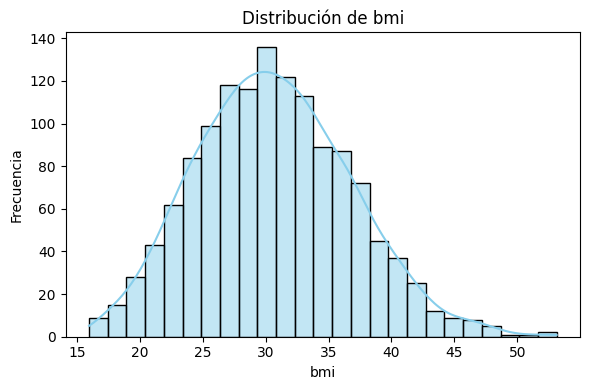

bmi → Asimetría: 0.28, Curtosis: -0.06


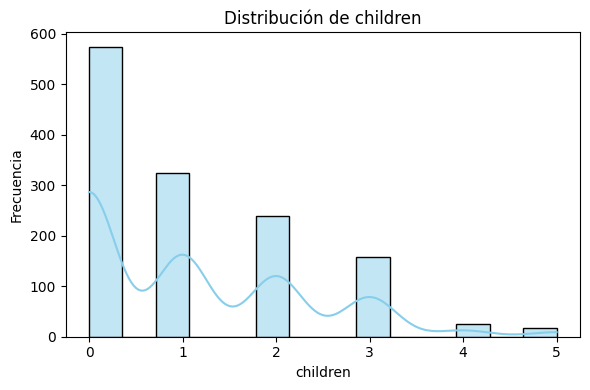

children → Asimetría: 0.94, Curtosis: 0.20


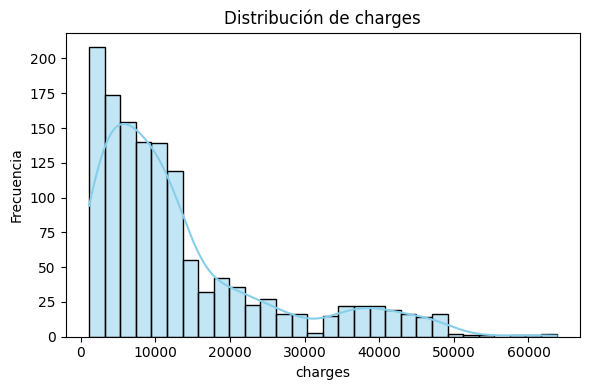

charges → Asimetría: 1.51, Curtosis: 1.60


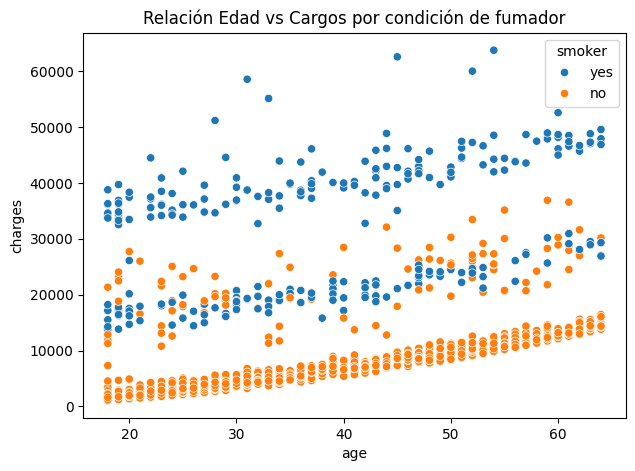

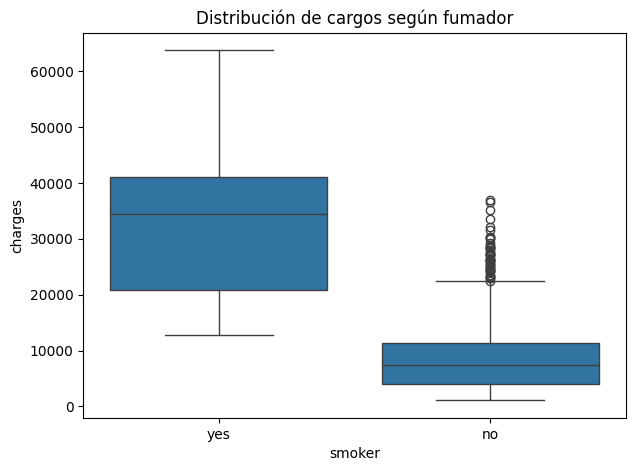

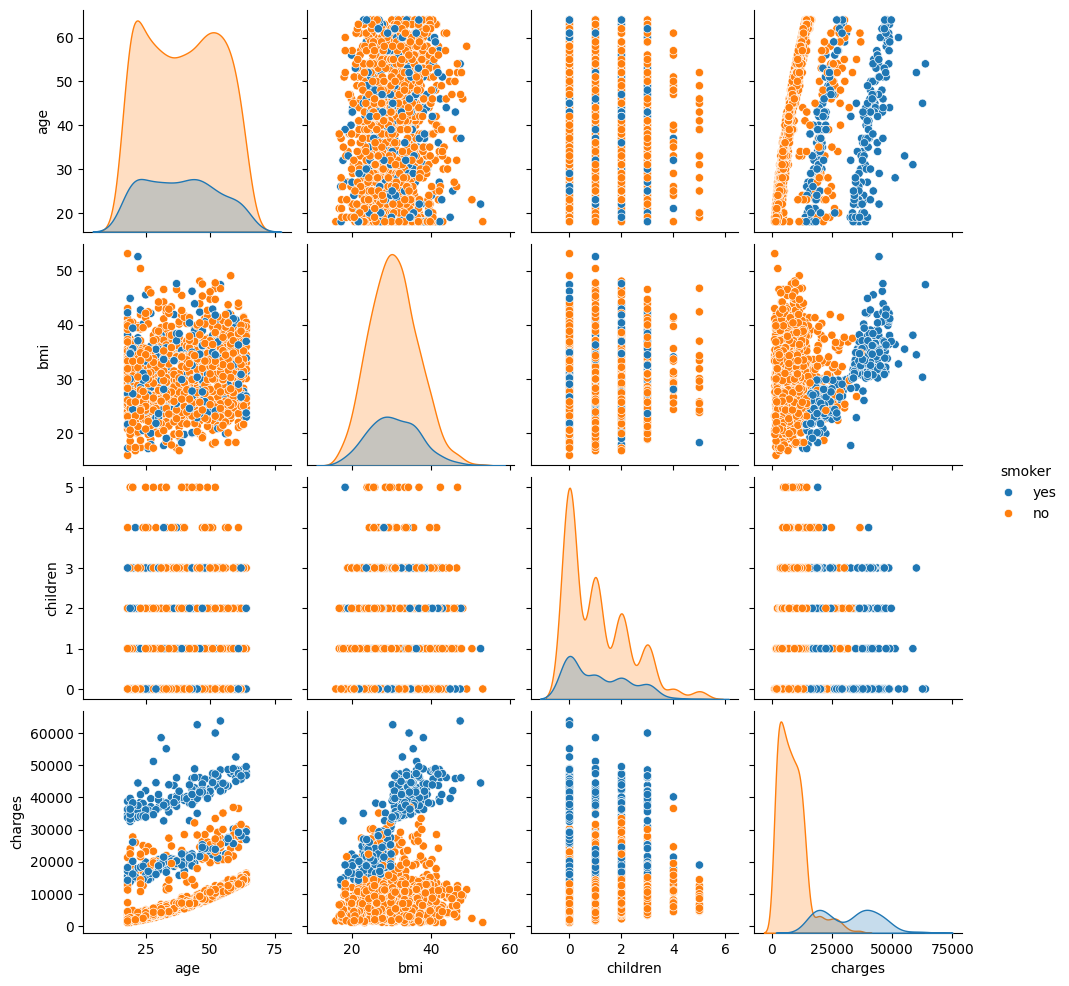

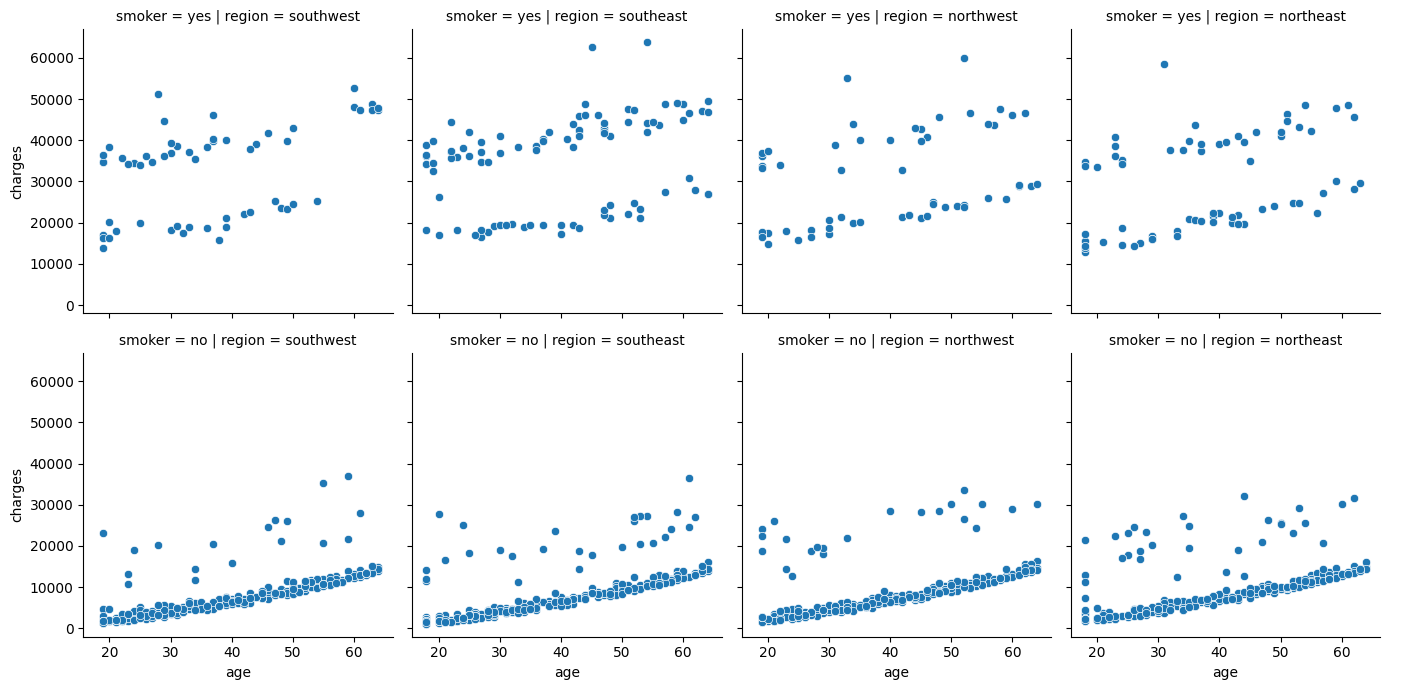

Archivo 'metricas_fumadores.csv' generado.
README.md generado.


In [32]:
# ==========================================
# Taller de Visualización de Datos en Python
# Dataset: Seguros
# ==========================================

# 1. Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 2. Cargar dataset
df_seguros = pd.read_csv(url_dataset)

# 3. Vista inicial
print(df_seguros.head())
print(df_seguros.info())

# ==========================================
# Análisis inicial: Distribución, Asimetría y Curtosis
# ==========================================
columnas_num = df_seguros.select_dtypes(include=np.number).columns

for col in columnas_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df_seguros[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.savefig(f"graf_{col}.png")  # Guardar gráfico para README
    plt.show()

    # Métricas de asimetría y curtosis
    asim = skew(df_seguros[col])
    curt = kurtosis(df_seguros[col])
    print(f"{col} → Asimetría: {asim:.2f}, Curtosis: {curt:.2f}")

# ==========================================
# Visualizaciones avanzadas
# ==========================================

# Scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_seguros, x="age", y="charges", hue="smoker")
plt.title("Relación Edad vs Cargos por condición de fumador")
plt.savefig("graf_scatter.png")
plt.show()

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df_seguros, x="smoker", y="charges")
plt.title("Distribución de cargos según fumador")
plt.savefig("graf_boxplot.png")
plt.show()

# Pairplot
sns.pairplot(df_seguros, hue="smoker", diag_kind="kde")
plt.savefig("graf_pairplot.png")
plt.show()

# FacetGrid sin BMI_cat: por región y fumador
g = sns.FacetGrid(df_seguros, col="region", row="smoker", height=3.5)
g.map_dataframe(sns.scatterplot, x="age", y="charges")
g.add_legend()
plt.savefig("graf_facetgrid.png")
plt.show()

# ==========================================
# Filtros y agrupaciones
# ==========================================

# Filtrado: solo fumadores
df_fumadores = df_seguros[df_seguros["smoker"] == "yes"]

# Métricas agrupadas por región y sexo
metricas = df_fumadores.groupby(["region", "sex"]).agg({
    "charges": ["mean", "median", "std", "count"],
    "age": ["mean", "max", "min"]
}).reset_index()

# Exportar métricas a CSV
metricas.to_csv("metricas_fumadores.csv", index=False)
print("Archivo 'metricas_fumadores.csv' generado.")

# ==========================================
# Generar README.md con referencias a las gráficas
# ==========================================
readme_content = """
# Taller de Visualización de Datos - Dataset Seguros

Este taller cubre:
1. Carga y exploración de datos
2. Gráficas de distribución, asimetría y curtosis
3. Visualizaciones avanzadas: scatterplot, boxplot, pairplot, facetgrid
4. Filtrado por condición (`smoker == "yes"`)
5. Exportación de métricas a CSV

## Gráficas Generadas

![Distribución Age](graf_age.png)
![Distribución BMI](graf_bmi.png)
![Distribución Charges](graf_charges.png)
![Scatter Edad vs Cargos](graf_scatter.png)
![Boxplot Cargos por Fumador](graf_boxplot.png)
![Pairplot](graf_pairplot.png)
![FacetGrid por región y fumador](graf_facetgrid.png)

## Archivo de métricas
El archivo `metricas_fumadores.csv` contiene estadísticas descriptivas para fumadores agrupadas por región y sexo.
"""

with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_content)

print("README.md generado.")
